In [1]:
from tensorflow.keras.datasets import boston_housing

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
import numpy as np

In [4]:
# data
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [5]:
train_data.shape

(404, 13)

In [6]:
train_targets.shape

(404,)

In [7]:
train_targets[0]

15.2

In [8]:
# 13 features on this data
train_data[2].shape

(13,)

All data is in different scales. And the targets are medians values of these houses in thousand of dollars.

# Preparing the data

**Applying normalization**: subtract each item from the mean and divide by the standard deviation. This way, we centered the data around the mean and has a unit standard deviation.

**Just remember to check if the distributions are closely to a normal distribution, for skewd distributions this tecnique is not the best choice.**

In [9]:
# normalizing
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

Observe that we use just the mean and std from the training data, to not occur data leakage.

# Building the model

The book consider 64 units of dimensions on each layer a small model, and good for cases that we have just few samples.

In [10]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)  # linear layer
    ])
    model.compile(
        optimizer="rmsprop",
        loss="mse",
        metrics=["mae"]
    )
    return model

# Validating using k-fold validation

In [16]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_scores = []

all_mae_histories = []
for i in range(k):
    print("Processing fold {}".format(i))
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0
    )
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0
    )
    model = build_model()
    history = model.fit(
        partial_train_data, partial_train_targets,
        epochs=num_epochs, batch_size=16, verbose=0,
        validation_data=(val_data, val_targets)
    )
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold 0
Processing fold 1
Processing fold 2
Processing fold 3


In [19]:
len(all_mae_histories[0])

500

In [13]:
np.mean(all_scores)

2.3328075

In [21]:
# on epochs get the mean of each validation set
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

In [23]:
len(average_mae_history)

500

In [24]:
import matplotlib.pyplot as plt

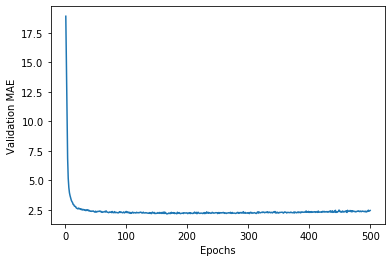

In [27]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

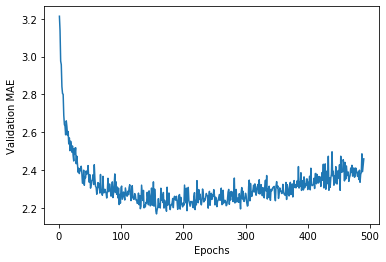

In [28]:
# truncate the values
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [29]:
# training our final model with epochs pick form the validation curve evaluation
model = build_model()
model.fit(
    train_data,
    train_targets,
    epochs=130,
    batch_size=16,
    verbose=0
)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 441us/sample - loss: 13.7981 - mae: 2.5477


In [30]:
test_mae_score

2.5476906

# Predictions

In [31]:
predictions = model.predict(test_data)

In [32]:
predictions[0]

array([8.688325], dtype=float32)